In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
questions_data = pd.read_csv("processed_questions.csv")

In [3]:
questions_data.head(2)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Id,OwnerUserId,CreationDate,Score,Title,Body,highest_answer_score,num_answers,has_positive_answer,Full_Text,Title_Word_Count,Body_Word_Count
0,0,0,0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,12,4,1,How can I find the full path to a font from it...,17,70
1,1,1,1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,9,2,1,Get a preview JPEG of a PDF on Windows? <p>I h...,9,38


In [4]:
from random import randint

In [5]:
def assign_train_test():
    rand = randint(0,10)
    # 20% to test, 80% to train
    if rand >= 8:
        return "TEST"
    return "TRAIN"

In [6]:
questions_data['SPLIT'] = questions_data.apply(lambda row: assign_train_test(), axis=1)

In [7]:
questions_data['SPLIT'].value_counts()

TRAIN    441582
TEST     165700
Name: SPLIT, dtype: int64

In [8]:
train_split = questions_data.loc[questions_data['SPLIT'] == 'TRAIN']
test_split = questions_data.loc[questions_data['SPLIT'] == 'TEST']

In [9]:
X_train = train_split['Title']
X_test = test_split['Title']

y_train = train_split['has_positive_answer']
y_test = test_split['has_positive_answer']

In [10]:
vect = CountVectorizer(stop_words = 'english')

x_train_cv = vect.fit_transform(X_train)
x_test_cv = vect.transform(X_test)

In [11]:
clf = MultinomialNB()
clf.fit(x_train_cv, y_train)

MultinomialNB()

### Test on the holdout data

In [12]:
y_pred_raw = clf.predict_proba(x_test_cv)

In [13]:
# we want the probability of the 1 class
y_pred_raw = [x[1] for x in y_pred_raw]

In [14]:
y_pred = (np.array(y_pred_raw) > 0.5).astype(int)

In [15]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_raw)
auc = metrics.roc_auc_score(y_test, y_pred_raw)

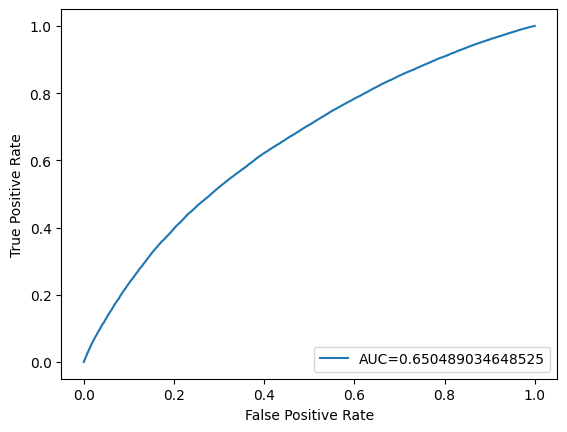

In [16]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [17]:
from sklearn.metrics import f1_score, precision_score, recall_score
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [18]:
from sklearn.metrics import f1_score, precision_score, recall_score
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [19]:
print(f"f1 score is: {f1}")
print(f"precision score is: {precision}")
print(f"recall score is: {recall}")

f1 score is: 0.7636899319313217
precision score is: 0.7208649996403826
recall score is: 0.811924499770475


In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

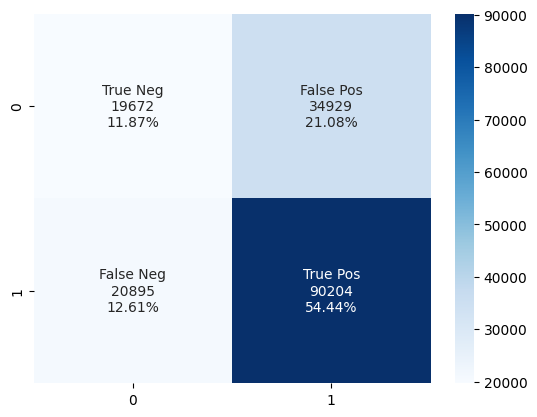

In [21]:
group_names = ["True Neg", "False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, fmt="", cmap='Blues', annot=labels)

## Use the predictions to add to the questions_data, and save it. This can be used later in combination with the pooled token

In [ ]:
def make_prediction(title):
    transformed_title = vect.transform([title])
    pos_probability = clf.predict_proba(transformed_title)[0][1]
    return pos_probability

In [ ]:
questions_data['NB_prediction'] = questions_data.apply(lambda row: make_prediction(row['Title']), axis=1)

In [ ]:
questions_data.to_csv("questions_nb_predictions.csv")

In [ ]:
questions_data.head(5)